In [2]:
import numpy as np
from benchmark.ode.integrate import generate_ode_data
from benchmark.ode.simple_ode import lorenz

x0 = [1, 1, 1]

N = 10000
t = np.linspace(0, 40, N, endpoint=False)

x, dx = generate_ode_data(lorenz, x0, t, {})

t2 = np.linspace(t[-1], 2*t[-1], N, endpoint=False)
x2, dx2 = generate_ode_data(lorenz, x[-1], t2, {"r": 15.0})

t3 = np.linspace(t2[-1], 3*t[-1], N, endpoint=False)
x3, dx3 = generate_ode_data(lorenz, x2[-1], t3, {"r": 28.0})

x_lorenz = np.vstack([x, x2, x3])
dx_lorenz = np.vstack([dx, dx2, dx3])
t_lorenz = np.hstack([t, t2, t3])

Text(0, 0.5, '$y(t)$')

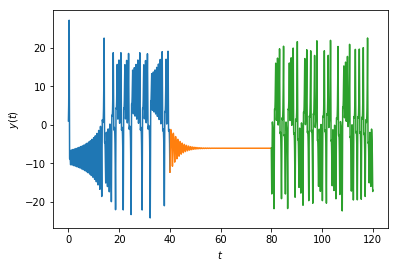

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

i = 1
plt.figure()
plt.plot(t, x[:, i])
plt.plot(t2, x2[:, i])
plt.plot(t3, x3[:, i])
plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")

#plt.savefig("../figures/lorenz/trajectory_y.pdf")

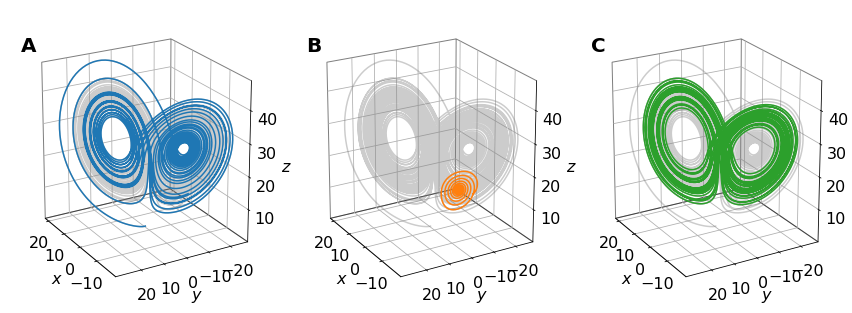

In [5]:
import string
import matplotlib as mpl

props = plt.rcParams["axes.prop_cycle"]
colors = iter(props.by_key()["color"])
alpha=0.4
with mpl.rc_context(rc={'font.size': 16}):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,
                                       subplot_kw=dict(projection="3d"),
                                       figsize=plt.figaspect(1/3.))


    ax1.plot(*x_lorenz.T, color="grey", alpha=alpha)
    ax1.plot(*x.T, color=next(colors))


    ax2.plot(*x_lorenz.T, color="grey", alpha=alpha)
    ax2.plot(*x2.T, color=next(colors))


    ax3.plot(*x_lorenz.T, color="grey", alpha=alpha)
    ax3.plot(*x3.T, color=next(colors))

    for i, ax in enumerate([ax1, ax2, ax3]):
        ax.set_xlabel(r"$x$")
        ax.set_ylabel(r"$y$")
        ax.set_zlabel(r"$z$")
        ax.patch.set_facecolor('white')
        ax.grid(alpha=0.1, linewidth=1)
        ax.xaxis.pane.set_edgecolor('black')
        ax.yaxis.pane.set_edgecolor('black')
        ax.zaxis.pane.set_edgecolor('black')
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.view_init(elev=20, azim=150)
        ax.text2D(0.05, 0.85, s=string.ascii_uppercase[i], transform=ax.transAxes, weight='bold', fontsize=20)
    plt.tight_layout()
    fig.subplots_adjust(left=0, right=0.97, bottom=0.03, top=1.07)
    #plt.savefig("../figures/lorenz/trajectory_3d.pdf")

In [6]:
from adaptive_sindy import analysis
from grid import grid

t_model = 10
t_update = 1
t_error = 0.5
error_threshold = 1.0
model_history, stats = analysis(grid, x_lorenz, dx_lorenz, t_lorenz, t_model,
                                t_update, t_error, error_threshold)


    initial model
dx_0/dt =  -9.996*x0+9.996*x1
dx_1/dt =  27.958*x0+-0.992*x1+-0.999*x0 x2
dx_2/dt =  -2.666*x2+0.999*x0 x1

   remodeling at  40.01199999999999 

dx_0/dt =  -9.998*x0+9.998*x1
dx_1/dt =  14.995*x0+-1.0*x1+-1.0*x0 x2
dx_2/dt =  -2.666*x2+1.0*x0 x1

   remodeling at  80.01600000000002 

dx_0/dt =  -9.997*x0+9.997*x1
dx_1/dt =  27.98*x0+-0.996*x1+-0.999*x0 x2
dx_2/dt =  -2.666*x2+1.0*x0 x1


In [ ]:
from adaptive_sindy import make_table
df = make_table("../tables/lorenz.tex", model_history, varnames="xyz")

In [ ]:
from grid import param_table
param_table()

In [9]:
from adaptive_sindy import make_targets


def targets1():
    lorenz_x = {"x0": -10, "x1": 10, "offset": 0}
    lorenz_y = {"x0": 28, "x1": -1, "x0x2": -1, "offset": 0}
    lorenz_z = {"x0x1": 1, "x2": -8/3, "offset": 0}
    return make_targets(grid, [lorenz_x, lorenz_y, lorenz_z])


def targets2():
    lorenz_x = {"x0": -10, "x1": 10, "offset": 0}
    lorenz_y = {"x0": 15, "x1": -1, "x0x2": -1, "offset": 0}
    lorenz_z = {"x0x1": 1, "x2": -8/3, "offset": 0}
    return make_targets(grid, [lorenz_x, lorenz_y, lorenz_z])


def get_targets(t):
    if 40 < t < 80:
        return targets2()
    else:
        return targets1()


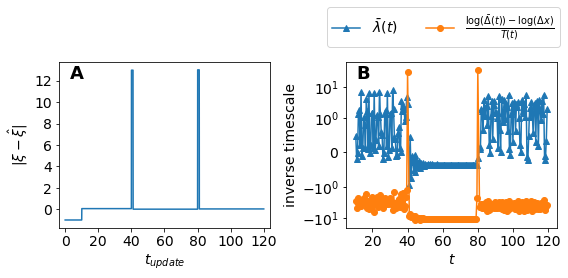

In [10]:
from adaptive_sindy import lyap_plot, plot_error

with mpl.rc_context(rc={'font.size': 14}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2.))
    lyap_plot(ax2, *stats)
    plot_error(ax1, model_history, t_lorenz, get_targets)
    for i, ax in enumerate([ax1, ax2]):
        ax.text(0.05, 0.9, s=string.ascii_uppercase[i], transform=ax.transAxes, weight="bold", fontsize=18)
lgd = ax2.get_legend()
plt.tight_layout()
#plt.savefig("../figures/lorenz/error_horizon.pdf", bbox_extra_artists=(lgd,), bbox_inches="tight")